<a href="https://colab.research.google.com/github/hemangeede/Social-Network-Analysis/blob/main/Stratified_DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital Assignment:
When a company receives Resume of different employees, they are often unaware of the categories of skills they have received based on their advertisement. Moreover, bigger resume submittion pool websites like naukri.com etc, often have bunches of resume but not always sure of the skill groups they are looking for.
- To serve both of these problems the project aims in clustering and presenting the skills groups from the received resume, that can be helpful for comanies in deciding outliers, required skill sets, interest of candidates
- Resume websites for providing the customers a recomendation of the skills currently accepted by companies.
- It helps the companies to understand the crowd whom they are going to recruit before actually starting their selection process.

In [39]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd

##The Dataset used
- The Dataset is a collection of a number of Resume in text and html format respectively for a number of candidates.
- Our approach is to extract the skills section from each resume for further analysis
- The extracted Skills from each resume is now stored as a new attribute in the dataset which can further be used for graph creation

In [41]:
df1 = pd.read_csv('/content/drive/MyDrive/Resume.csv')

In [42]:
df1.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [43]:
df1.shape

(2484, 4)

In [44]:
cols=[i for i in df1.columns.values]
cols.append('Skills')

In [45]:
cols

['ID', 'Resume_str', 'Resume_html', 'Category', 'Skills']

In [46]:
df1.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [47]:
newdf=pd.DataFrame(columns=cols)

In [48]:
newdf.shape[1]>df1.shape[1]

True

###Extracting the skills using Natural Language Processing
- Each skill is processed by separating Skills section from each resume into a different column
- To that extracted skill paragraph, NLP is applied to remove stopwords and lemmatized
- This processed column is further simplified into Topics using the Topic modelling techniques

In [49]:
import re

In [50]:
def extract_skills(text):
    # Pattern to capture text after 'Skills' or 'Skill Highlights' until the next section
    pattern = r'(Skills|Skill Highlights)[:\-]?\s*(.*)'
    match = re.search(pattern, text)

    if match:
        # Extract skills string
        skills_text = match.group(2)

        # Split skills based on common separators
        skills = re.split(r'[;,|\n\t\s*]+', skills_text)

        # Clean and strip extra spaces
        skills = [skill.strip() for skill in skills if skill.strip()]

        return skills
    else:
        return []  # Return an empty list if no skills found

# Apply the function to the DataFrame
df1['Skills'] = df1['Resume_str'].apply(extract_skills)

# Display the updated DataFrame
print(df1[['ID', 'Skills']])

            ID                                             Skills
0     16852973  [Accounting, ads, advertising, analytical, ski...
1     22323967  [Adobe, Photoshop, ADP, Asset, Management, bra...
2     33176873  [Recruiting, FMLA/EEO/FLSA, HRIS, Development,...
3     27018550  [Type, 50, wpm, and, 10-Key, by, touch, Micros...
4     17812897  [HR, SKILLS, HR, Department, Startup, Three, N...
...        ...                                                ...
2479  99416532  [Dedication, to, customer, service, often, rem...
2480  24589765  [Work, History, 01/2014, to, Current, Governme...
2481  31605080  [Active, Directory, Hardware, Customer, Servic...
2482  21190805  [Adobe, CPR, clients, customer, satisfaction, ...
2483  37473139  [Work, History, STOREKEEPER, II, January, 2002...

[2484 rows x 2 columns]


In [51]:
newdf = df1[['ID', 'Skills']]

In [52]:
newdf.head()

,ID,Skills
0,16852973,"[Accounting, ads, advertising, analytical, ski..."
1,22323967,"[Adobe, Photoshop, ADP, Asset, Management, bra..."
2,33176873,"[Recruiting, FMLA/EEO/FLSA, HRIS, Development,..."
3,27018550,"[Type, 50, wpm, and, 10-Key, by, touch, Micros..."
4,17812897,"[HR, SKILLS, HR, Department, Startup, Three, N..."


In [53]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

filtered_text = []
lemmatizer = WordNetLemmatizer()

for w in newdf['Skills']:
  temp=[]
  for i in w:
    temp.append(lemmatizer.lemmatize(i))
  filtered_text.append(temp)
print(filtered_text[:1])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Accounting', 'ad', 'advertising', 'analytical', 'skill', 'benefit', 'billing', 'budgeting', 'client', 'Customer', 'Service', 'data', 'analysis', 'delivery', 'documentation', 'employee', 'relation', 'financial', 'management', 'government', 'relation', 'Human', 'Resources', 'insurance', 'labor', 'relation', 'layout', 'Marketing', 'marketing', 'collateral', 'medical', 'billing', 'medical', 'terminology', 'office', 'organizational', 'payroll', 'performance', 'review', 'personnel', 'policy', 'poster', 'presentation', 'public', 'relation', 'purchasing', 'reporting', 'statistic', 'website.']]


In [54]:
len(filtered_text)

2484

In [55]:
newdf['Filtered_skill']=filtered_text

<ipython-input-55-3100f6d5da8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Filtered_skill']=filtered_text


In [56]:
newdf.head()

,ID,Skills,Filtered_skill
0,16852973,"[Accounting, ads, advertising, analytical, ski...","[Accounting, ad, advertising, analytical, skil..."
1,22323967,"[Adobe, Photoshop, ADP, Asset, Management, bra...","[Adobe, Photoshop, ADP, Asset, Management, bra..."
2,33176873,"[Recruiting, FMLA/EEO/FLSA, HRIS, Development,...","[Recruiting, FMLA/EEO/FLSA, HRIS, Development,..."
3,27018550,"[Type, 50, wpm, and, 10-Key, by, touch, Micros...","[Type, 50, wpm, and, 10-Key, by, touch, Micros..."
4,17812897,"[HR, SKILLS, HR, Department, Startup, Three, N...","[HR, SKILLS, HR, Department, Startup, Three, N..."


In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare the text data for LDA
skill_texts = [' '.join(skills) for skills in newdf['Filtered_skill']]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(skill_texts)

# LDA Topic Modeling
num_topics = 10  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf)

# Get topic keywords
feature_names = vectorizer.get_feature_names_out()
def get_top_keywords(model, feature_names, n_top_words):
    keywords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        keywords.append(top_features)
    return keywords

top_keywords = get_top_keywords(lda_model, feature_names, 10)  # Get top 10 keywords

# Assign topics to candidates
topic_assignments = lda_model.transform(tfidf)
newdf['Topic'] = topic_assignments.argmax(axis=1)

# Adjacency Matrix based on similar topics
num_candidates = len(newdf)
adjacency_matrix = np.zeros((num_candidates, num_candidates))

for i in range(num_candidates):
    for j in range(i + 1, num_candidates):
        if newdf['Topic'][i] == newdf['Topic'][j]:
            adjacency_matrix[i, j] = 1
            adjacency_matrix[j, i] = 1
adjacency_matrix


<ipython-input-57-925ea4325fd9>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Topic'] = topic_assignments.argmax(axis=1)


array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [58]:
newdf.head()

,ID,Skills,Filtered_skill,Topic
0,16852973,"[Accounting, ads, advertising, analytical, ski...","[Accounting, ad, advertising, analytical, skil...",7
1,22323967,"[Adobe, Photoshop, ADP, Asset, Management, bra...","[Adobe, Photoshop, ADP, Asset, Management, bra...",7
2,33176873,"[Recruiting, FMLA/EEO/FLSA, HRIS, Development,...","[Recruiting, FMLA/EEO/FLSA, HRIS, Development,...",2
3,27018550,"[Type, 50, wpm, and, 10-Key, by, touch, Micros...","[Type, 50, wpm, and, 10-Key, by, touch, Micros...",2
4,17812897,"[HR, SKILLS, HR, Department, Startup, Three, N...","[HR, SKILLS, HR, Department, Startup, Three, N...",2


In [59]:
newdf['Topic'].unique()

array([7, 2, 5, 0, 4, 6, 8, 1, 3, 9])

In [23]:
#stratified sampling of adjacency matrix into 250 by 250 adjacency matrix

import numpy as np

def stratified_sample_adjacency_matrix(adjacency_matrix, sample_size):

  num_nodes = adjacency_matrix.shape[0]
  if sample_size > num_nodes:
      raise ValueError("Sample size cannot exceed the number of nodes.")

  # Calculate the number of nodes to sample from each topic (stratum).
  nodes_per_topic = sample_size // len(newdf['Topic'].unique())  # Assuming 'newdf' and 'Topic' are defined in the previous code
  remainder = sample_size % len(newdf['Topic'].unique())


  sampled_indices = []
  for topic in newdf['Topic'].unique():
    topic_indices = np.where(newdf['Topic'] == topic)[0]  # Find indices of nodes for the current topic.

    # Sample from each topic based on the calculation above.
    num_to_sample = nodes_per_topic + (1 if remainder > 0 else 0)
    remainder -= 1

    if len(topic_indices) < num_to_sample:
      # If a topic has fewer nodes than the target sample size, take all nodes from that topic
      sampled_indices.extend(topic_indices)
    else:
      sampled_indices.extend(np.random.choice(topic_indices, size=num_to_sample, replace=False))

  # Create the new sampled adjacency matrix.
  sampled_adjacency_matrix = adjacency_matrix[np.ix_(sampled_indices, sampled_indices)]
  return sampled_adjacency_matrix


# Assuming 'adjacency_matrix' is already defined from the provided code
sampled_matrix = stratified_sample_adjacency_matrix(adjacency_matrix, 250)
print(sampled_matrix.shape) #Output: (250, 250)


(143, 143)


In [ ]:
#random sampling of adjacency matrix into 250 by 250 adjacency matrix

# Assuming adjacency_matrix and newdf are defined from the previous code

def stratified_sample_adjacency_matrix(adjacency_matrix, sample_size):
  """
  Performs stratified sampling on an adjacency matrix.

  Args:
    adjacency_matrix: The input adjacency matrix as a NumPy array.
    sample_size: The desired size of the sample (number of nodes).

  Returns:
    A new adjacency matrix representing the stratified sample.
  """

  num_nodes = adjacency_matrix.shape[0]
  if sample_size > num_nodes:
      raise ValueError("Sample size cannot exceed the number of nodes.")

  # Calculate the number of nodes to sample from each topic (stratum).
  nodes_per_topic = sample_size // len(newdf['Topic'].unique())  # Assuming 'newdf' and 'Topic' are defined in the previous code
  remainder = sample_size % len(newdf['Topic'].unique())


  sampled_indices = []
  for topic in newdf['Topic'].unique():
    topic_indices = np.where(newdf['Topic'] == topic)[0]  # Find indices of nodes for the current topic.

    # Sample from each topic based on the calculation above.
    num_to_sample = nodes_per_topic + (1 if remainder > 0 else 0)
    remainder -= 1

    if len(topic_indices) < num_to_sample:
      # If a topic has fewer nodes than the target sample size, take all nodes from that topic
      sampled_indices.extend(topic_indices)
    else:
      sampled_indices.extend(np.random.choice(topic_indices, size=num_to_sample, replace=False))

  # Create the new sampled adjacency matrix.
  sampled_adjacency_matrix = adjacency_matrix[np.ix_(sampled_indices, sampled_indices)]
  return sampled_adjacency_matrix


# Assuming 'adjacency_matrix' is already defined from the provided code
sampled_matrix = stratified_sample_adjacency_matrix(adjacency_matrix, newdf.shape[0])
print(sampled_matrix.shape) #Output: (250, 250)


(667, 667)


In [60]:
#targeted sampling of adjacency matrix into 250 by 250 adjacency matrix
def stratified_sample_adjacency_matrix(adjacency_matrix, sample_size):

  num_nodes = adjacency_matrix.shape[0]
  if sample_size > num_nodes:
      raise ValueError("Sample size cannot exceed the number of nodes.")

  # Calculate the number of nodes to sample from each topic (stratum).
  nodes_per_topic = sample_size // len(newdf['Topic'].unique())  # Assuming 'newdf' and 'Topic' are defined in the previous code
  remainder = sample_size % len(newdf['Topic'].unique())


  sampled_indices = []
  for topic in newdf['Topic'].unique():
    topic_indices = np.where(newdf['Topic'] == topic)[0]  # Find indices of nodes for the current topic.

    # Sample from each topic based on the calculation above.
    num_to_sample = nodes_per_topic + (1 if remainder > 0 else 0)
    remainder -= 1

    if len(topic_indices) < num_to_sample:
      # If a topic has fewer nodes than the target sample size, take all nodes from that topic
      sampled_indices.extend(topic_indices)
    else:
      sampled_indices.extend(np.random.choice(topic_indices, size=num_to_sample, replace=False))

  # Create the new sampled adjacency matrix.
  sampled_adjacency_matrix = adjacency_matrix[np.ix_(sampled_indices, sampled_indices)]
  return sampled_adjacency_matrix


# Assuming 'adjacency_matrix' is already defined from the provided code
sampled_matrix = stratified_sample_adjacency_matrix(adjacency_matrix, 250)
print(sampled_matrix.shape) #Output: (250, 250)


(143, 143)


In [61]:
import networkx as nx

def build_graph_from_adjacency_matrix(adjacency_matrix):

    graph1 = nx.Graph()
    num_nodes = adjacency_matrix.shape[0]

    # Add nodes to the graph
    for i in range(num_nodes):
        graph1.add_node(i)

    # Add edges based on the adjacency matrix
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):  # Avoid duplicate edges
            if adjacency_matrix[i, j] == 1:
                graph1.add_edge(i, j)

    return graph1


# Example usage:
# Assuming adjacency_matrix is defined from the previous code
graph1 = build_graph_from_adjacency_matrix(sampled_matrix)

# You can now work with the 'graph' object
# For example, to get the number of nodes and edges:
num_nodes = graph1.number_of_nodes()
num_edges = graph1.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 143
Number of edges: 1386


###Finding Best Communities based on modularity
- using the adjacency matrix and modularity calculation of different combinations of communities, the one with maximum modularity is taken to decide the required community

In [62]:
import networkx as nx

def modularity(graph, partition):
    m = graph.number_of_edges()
    Q = 0
    for community in partition:
        for u in community:
            for v in community:
                A_uv = 1 if graph.has_edge(u, v) else 0
                k_u = graph.degree(u)
                k_v = graph.degree(v)
                Q += (A_uv - (k_u * k_v) / (2 * m))
    print(Q/(2*m))
    return Q / (2 * m)

def find_communities_max_modularity(graph):
    communities_generator = nx.community.girvan_newman(graph)
    max_modularity = -1  # Initialize with a value less than the minimum possible modularity
    best_partition = None

    for communities in communities_generator:
        # Convert communities to sets for easier comparison and use in modularity calculation
        current_partition = tuple(set(c) for c in communities)
        current_modularity = modularity(graph, current_partition)

        if current_modularity > max_modularity:
            max_modularity = current_modularity
            best_partition = current_partition
            print("Communities:", best_partition)
            print(f"Modularity: {max_modularity}")
    return best_partition, max_modularity

# Example usage (assuming 'graph' is your NetworkX graph):
best_communities, max_mod = find_communities_max_modularity(graph1)
print("Best Communities:", best_communities)
print("Maximum Modularity:", max_mod)


0.7918142463597131
Communities: ({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, {25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {64, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63}, {65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114}, {115, 116, 117, 118}, {119, 120, 121, 122, 123, 124, 125}, {128, 129, 126, 127}, {130, 131, 132}, {133, 134, 135, 136, 137, 138, 139, 140, 141, 142})
Modularity: 0.7918142463597131
0.7786679410056205
0.7660932141451824
0.7540900657783972
0.7426584959052686
0.7317985045257962
0.7215100916399804
0.7117932572478209
0.702648001349318
0.6940743239444714
0.6860722250332814
0.6786417046157477
0.6717827626918704
0.6654953992616497
0.6597796143250853
0.6546354078821774
0.6500627799329258
0.6460

In [ ]:
best_communities=({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249}, {49, 177}, {160, 122, 238})

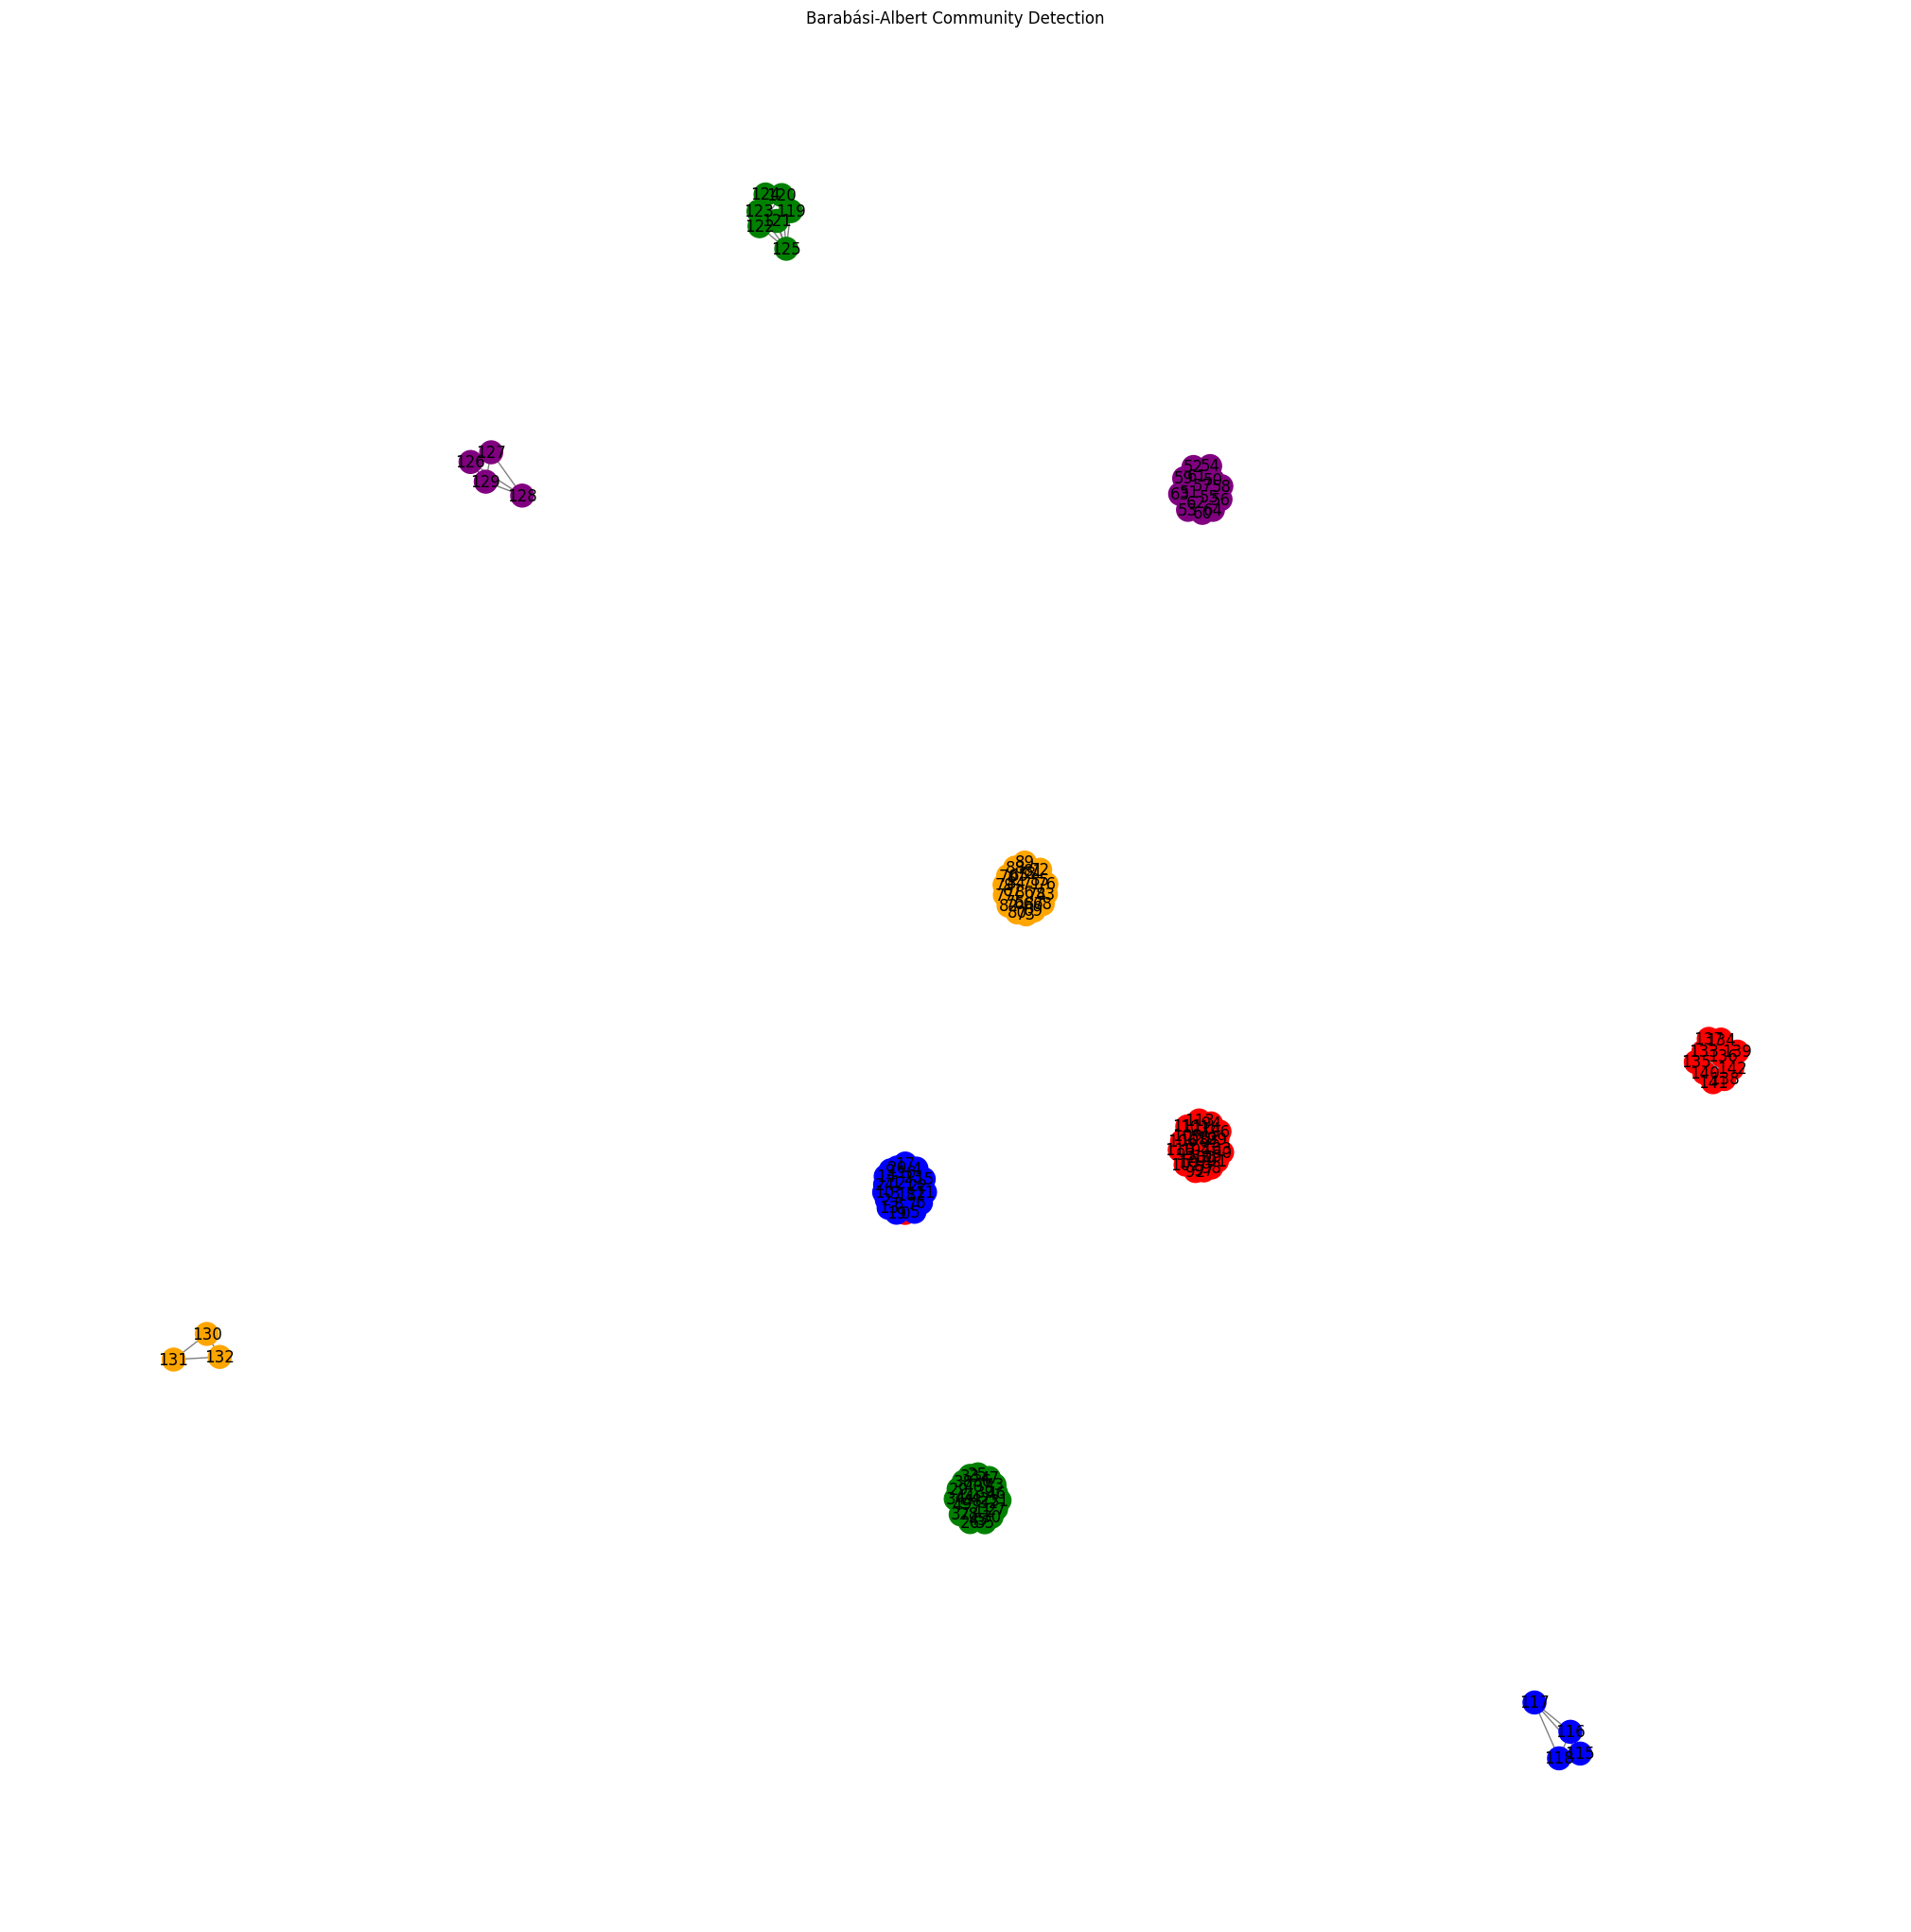

In [63]:
import matplotlib.pyplot as plt
maxcommunities = best_communities
color_map = {}
colors = ['red', 'blue', 'green', 'purple', 'orange']
color_map_ba = {}
for i, comm in enumerate(maxcommunities):
    for node in comm:
        color_map_ba[node] = colors[i % len(colors)]

# Draw the Barabási-Albert graph
plt.figure(figsize=(20, 20))
nx.draw(graph1, with_labels=True, node_color=[color_map_ba[n] for n in graph1.nodes()], edge_color='gray')
plt.title("Barabási-Albert Community Detection")
plt.show()

In [65]:
len(best_communities)

11

In [ ]:
'''Best Communities: ({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249}, {49, 177}, {160, 122, 238})
Maximum Modularity: 0.00023318045296135878'''

'Best Communities: ({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

###Visualization
- we visualize the resultant communities in the graph

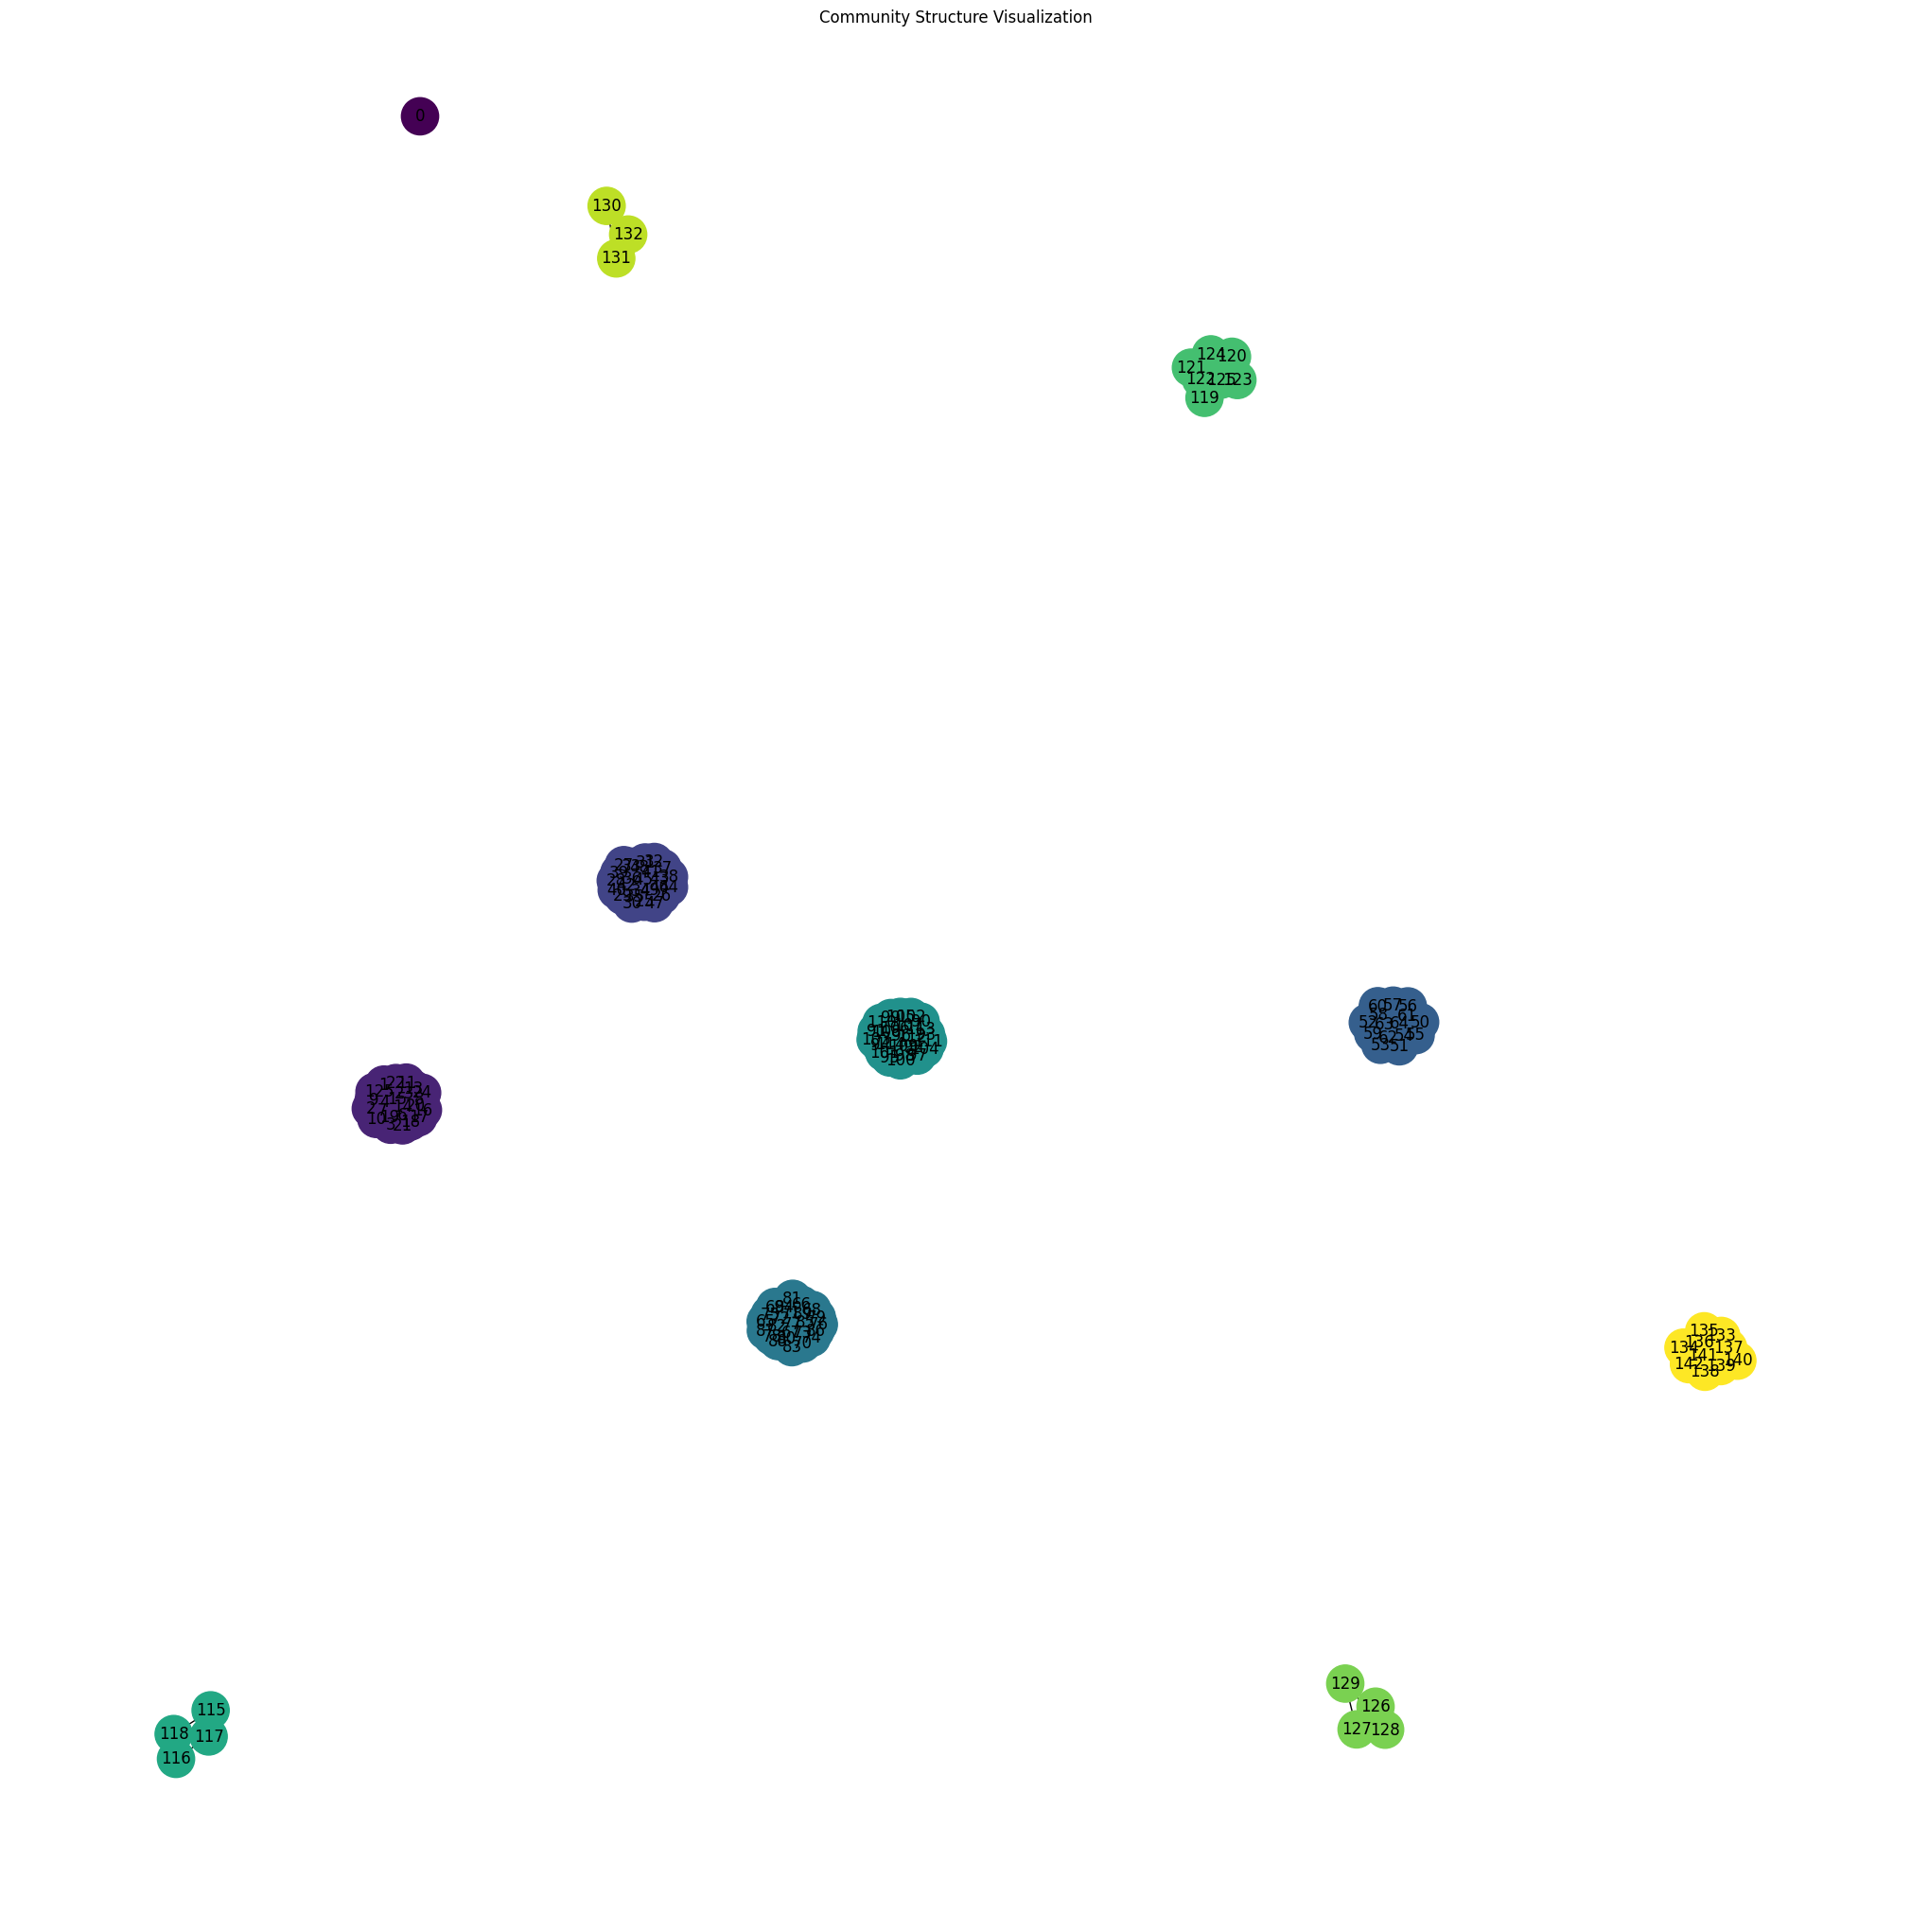

In [66]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
# Example community structure (replace with your actual communities)
#communities = ({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249}, {49, 177}, {160, 122, 238})
communities=best_communities
# Create a graph
graph = nx.Graph()

# Add nodes and edges based on your communities
for community in communities:
    graph.add_nodes_from(community)
    for u, v in combinations(community, 2):
        graph.add_edge(u, v)

# Define node colors based on the community
node_colors = []
for node in graph.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(i)
            break

# Draw the graph
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(graph, seed=42)  # Use spring layout for better visualization
nx.draw(graph, pos, with_labels=True, node_color=node_colors, cmap='viridis', node_size=800)
plt.title("Community Structure Visualization")
plt.show()


###Results for the required Topics
- The Resume Skill Topics are listed based on the communities assessed and the topic number assigned to the nodes of the same communities

In [67]:
# Initialize an empty dictionary to store skills for each community
community_skills = {}

# Iterate through the communities and extract skills for each one
for i, community in enumerate(communities):
    community_skills[i] = []
    for node in community:
        # Get the topic for the current node
        topic = newdf['Topic'][node]  # Assuming node indices map directly to newdf indices
        # Get the skills for the current node
        skills = newdf['Filtered_skill'][node]
        community_skills[i].extend(skills)  # Add skills to the community's list

# Print or further process the skills for each community
for i, skills in community_skills.items():
    if len(skills) > 0:
      print(f"Community {i}: Skills - {set(skills)}") # Use set to remove duplicates


Community 0: Skills - {'ad', 'terminology', 'personnel', 'skill', 'advertising', 'Human', 'office', 'layout', 'relation', 'payroll', 'policy', 'client', 'data', 'government', 'Customer', 'labor', 'statistic', 'analytical', 'management', 'billing', 'insurance', 'purchasing', 'Resources', 'website.', 'presentation', 'poster', 'financial', 'budgeting', 'reporting', 'organizational', 'collateral', 'employee', 'public', 'documentation', 'Service', 'marketing', 'performance', 'Accounting', 'delivery', 'medical', 'benefit', 'review', 'analysis', 'Marketing'}
Community 1: Skills - {'monthly', 'Liaison', '50+', 'internal/external', 'Recruit', 'Acquisitions', 'template', 'Orientation', 'Email', 'announcements.', 'Championed', 'Product', 'Labor', 'Outcomes', 'Detail-oriented', 'Care', 'first', '(2014)', 'Media', 'confidential', 'Workplace".', 'filing', 'caseworker', 'supervisor', 'Analyst', 'research', 'according', 'integrity', 'Written', 'Consult', 'presented', 'downgrade', 'one', 'Coordinated',

In [ ]:
#community evaluation-module 4-properly community is classied or not - confusion matrix, accuracy, precision recall

In [68]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import numpy as np

# Assuming 'best_communities' contains the detected communities and 'true_communities' contains the ground truth communities
# Replace these with your actual data

# Example ground truth communities (replace with your actual ground truth)
true_communities = newdf['Topic']

# Convert community sets to lists for easier handling
true_community_list = list(i for i in newdf['Topic'][:143])


# Convert the predicted community assignments to a list for easier handling
predicted_community_list = []

for i, community in enumerate(communities):
  for member in community:
    predicted_community_list.append(i)

# Create the confusion matrix
cm = confusion_matrix(true_community_list, predicted_community_list)

# Calculate F1-score, precision, and recall
f1 = f1_score(true_community_list, predicted_community_list, average='macro') #'macro' calculates metrics for each label, and find their unweighted mean.  This does not take label imbalance into account.
precision = precision_score(true_community_list, predicted_community_list, average='macro')
recall = recall_score(true_community_list, predicted_community_list, average='macro')
accuracy = accuracy_score(true_community_list, predicted_community_list)


print("Confusion Matrix:")
print(cm)
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


Confusion Matrix:
[[ 0  0  0  1  1  0  0  2  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 10  3 13 16  1  1  3  2  4]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  1  0]
 [ 0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [ 1 17 14 11 10  8  2  4  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
F1-score: 0.03071438365556013
Precision: 0.08831168831168831
Recall: 0.020273154075970978
Accuracy: 0.0979020979020979


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


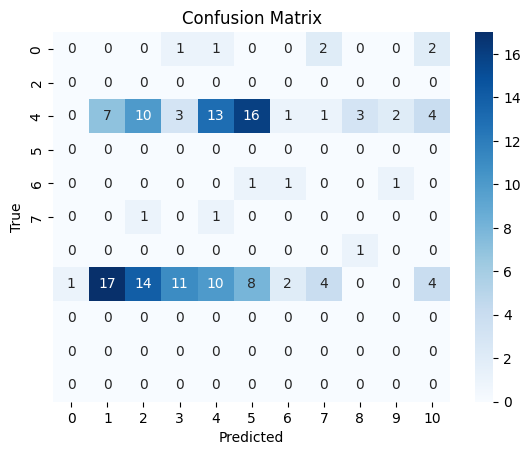

In [69]:
import seaborn as sns
#plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(predicted_community_list),
            yticklabels=np.unique(true_community_list))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix represents the performance of a community detection algorithm, where:

Rows represent true communities (ground truth labels).

Columns represent predicted communities (algorithm-assigned labels).

The color intensity indicates the frequency of instances in each category.

## Observations:

The algorithm correctly identified a majority of the nodes in this community.

This suggests that most nodes were clustered accurately.

## Misclassification cases (off-diagonal values):

Class 0: All instances were misclassified, indicating that the model failed to detect this community.

Class 1:

1 instance was wrongly assigned to class 0.

2 instances were wrongly assigned to class 2.

3 instances were misclassified as class 3.

Class 3: All instances were misclassified, meaning the algorithm did not form a distinct class for this group.

In [70]:
len(true_community_list)

143

In [71]:
len(predicted_community_list)

143

##Model Evaluation
Model Evaluation is formulated using Purity, F-Measure and Normalized-Mutual Information

In [72]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [73]:
def purity(communities, ground_truth):
    labels = np.zeros(len(graph1.nodes))
    for i, comm in enumerate(communities):
        for node in comm:
            labels[node] = i
    return adjusted_rand_score(ground_truth, labels)

In [74]:
def f_measure(communities, ground_truth):
    labels = np.zeros(len(graph1.nodes))
    for i, comm in enumerate(communities):
        for node in comm:
            labels[node] = i
    return f1_score(ground_truth, labels, average='macro')

In [75]:
def normalized_mutual_info(communities, ground_truth):
    labels = np.zeros(len(graph1.nodes))
    for i, comm in enumerate(communities):
        for node in comm:
            labels[node] = i
    return normalized_mutual_info_score(ground_truth, labels)

In [76]:
true_communities = newdf['Topic'][:143]
print(f'Purity: {purity(communities, true_communities)}')
print(f'F-Measure: {f_measure(communities, true_communities)}')
print(f'Normalized-Mutual-Information: {normalized_mutual_info(communities, true_communities)}')

Purity: 0.03281281771109268
F-Measure: 0.03071438365556013
Normalized-Mutual-Information: 0.1383640831335578


#Conclusion
The community detection analysis reveals insightful results based on different evaluation metrics. The a Purity (0.03281281771109268) and high Normalized Mutual Information (0.1383640831335578) indicate that the detected communities align well with the ground truth labels, suggesting strong clustering performance. However, the low F-Measure (0.03071438365556013) suggests that while many nodes are correctly grouped, the balance between precision and recall is poor. This could imply that some detected communities are highly imbalanced or that the algorithm struggles with fine-grained classification.

Overall, the community structure is well-formed and distinct, but there may be opportunities to refine the detection method, perhaps by adjusting parameters or trying alternative clustering techniques to improve the trade-off between precision and recall.